___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# from scipy.stats import zscore
# from scipy import stats
# from numpy import percentile
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

#### *ii. Load Dataset*

In [4]:
df0 = pd.read_csv("treetypes.csv")
df = df0.copy()
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [5]:
pd.options.display.float_format = '{:,.10f}'.format

In [6]:
# df.info()
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Elevation,"250,000.0000000000","2,748.5051600000",418.3009745102,"1,859.0000000000","2,375.0000000000","2,753.0000000000","3,108.0000000000","3,857.0000000000"
Aspect,"250,000.0000000000",156.2121720000,109.6528467575,0.0000000000,65.0000000000,125.0000000000,260.0000000000,360.0000000000
Slope,"250,000.0000000000",16.3310520000,8.3174903244,0.0000000000,10.0000000000,15.0000000000,22.0000000000,65.0000000000
Horizontal_Distance_To_Hydrology,"250,000.0000000000",228.0940320000,209.6301534827,0.0000000000,66.0000000000,180.0000000000,330.0000000000,"1,390.0000000000"
Vertical_Distance_To_Hydrology,"250,000.0000000000",50.8978200000,61.0069671648,-163.0000000000,5.0000000000,32.0000000000,79.0000000000,598.0000000000
Horizontal_Distance_To_Roadways,"250,000.0000000000","1,719.9665760000","1,330.8176026101",0.0000000000,756.0000000000,"1,318.0000000000","2,294.0000000000","7,112.0000000000"
Hillshade_9am,"250,000.0000000000",212.3704880000,30.6545824544,0.0000000000,195.0000000000,220.0000000000,235.0000000000,254.0000000000
Hillshade_Noon,"250,000.0000000000",218.5107000000,22.6809470528,0.0000000000,206.0000000000,222.0000000000,235.0000000000,254.0000000000
Hillshade_3pm,"250,000.0000000000",134.5027640000,46.0338918280,0.0000000000,106.0000000000,137.0000000000,167.0000000000,252.0000000000
Horizontal_Distance_To_Fire_Points,"250,000.0000000000","1,521.7569040000","1,107.3783730901",0.0000000000,734.0000000000,"1,273.0000000000","1,998.0000000000","7,150.0000000000"


In [5]:
len(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
            'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'])

10

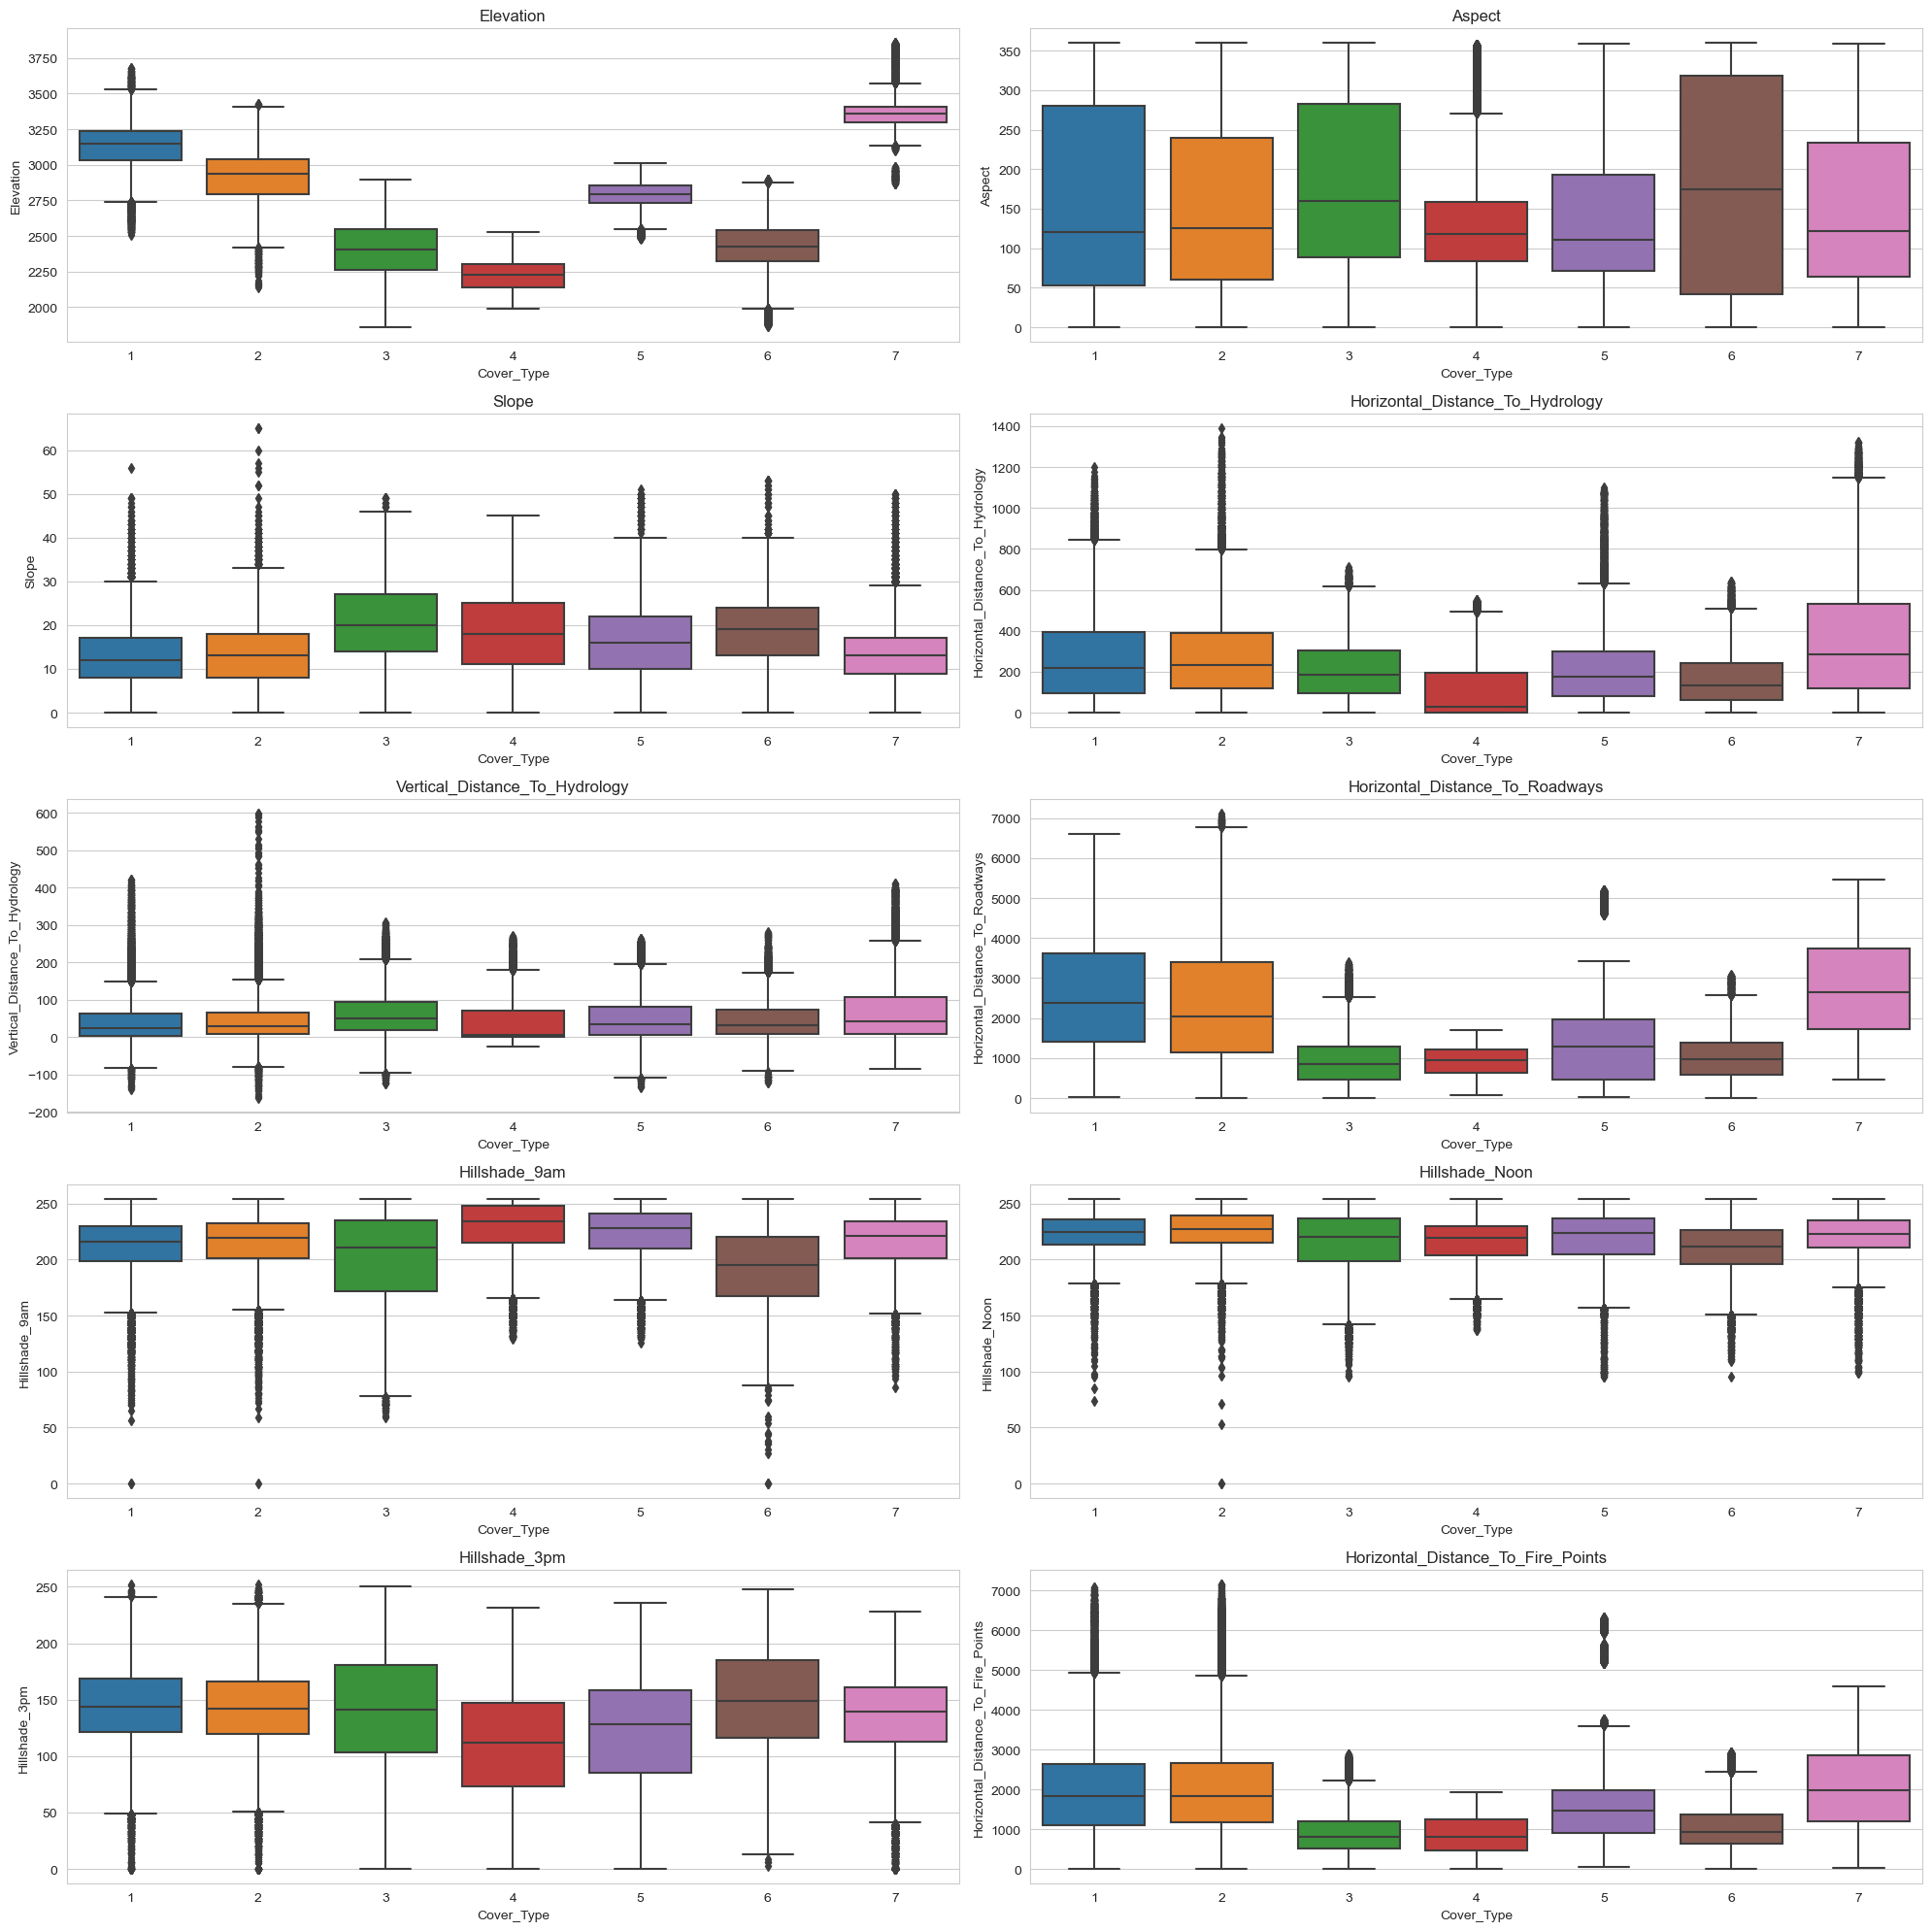

In [8]:
plt.figure(figsize=(20,20))
for i,col in enumerate(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
            'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'],1):
    plt.subplot(5,2,i)
    # print("-----------",i,"--",col,"---------------")
    plt.title(col)
    sns.boxplot(y=df[col], x=df["Cover_Type"])
    plt.tight_layout()
    

In [10]:
for col in df.columns:
    print(f"Column {col:<35} has ---> {df[col].nunique():<6} unique values")

Column Elevation                           has ---> 1983   unique values
Column Aspect                              has ---> 361    unique values
Column Slope                               has ---> 59     unique values
Column Horizontal_Distance_To_Hydrology    has ---> 1294   unique values
Column Vertical_Distance_To_Hydrology      has ---> 578    unique values
Column Horizontal_Distance_To_Roadways     has ---> 6501   unique values
Column Hillshade_9am                       has ---> 207    unique values
Column Hillshade_Noon                      has ---> 165    unique values
Column Hillshade_3pm                       has ---> 253    unique values
Column Horizontal_Distance_To_Fire_Points  has ---> 6487   unique values
Column Wilderness_Area_1                   has ---> 2      unique values
Column Wilderness_Area_2                   has ---> 2      unique values
Column Wilderness_Area_3                   has ---> 2      unique values
Column Wilderness_Area_4                   has --->

<AxesSubplot:ylabel='Cover_Type'>

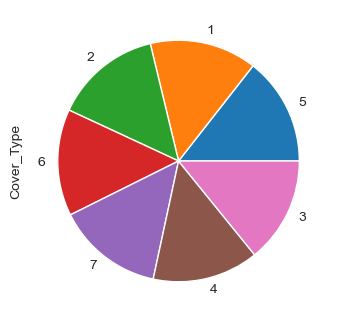

In [12]:
df.Cover_Type.value_counts().plot.pie()

In [13]:
lst = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
            'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

In [14]:
def outlier_report(df, cols, whisker=1.5):
    res = {}
    for col in cols:
        iqr = np.quantile(df[col],[.25,.75])[1] - np.quantile(df[col],[.25,.75])[0]
        lower_limit = np.quantile(df[col],[.25,.75])[0]- iqr*whisker 
        upper_limit = np.quantile(df[col],[.25,.75])[1]+iqr*whisker
        num = len([c for c in df[col].to_list() if (c<lower_limit or c>upper_limit)])
        if num > 0:res[col]={"lower_limit":lower_limit, "upper_limit":upper_limit, "iqr": iqr, "# of outliers":num}
    return pd.DataFrame(res).T
res = outlier_report(df, lst)

In [16]:
res

,lower_limit,upper_limit,iqr,# of outliers
Slope,-8.0000000000,40.0000000000,12.0000000000,850.0000000000
Horizontal_Distance_To_Hydrology,-330.0000000000,726.0000000000,264.0000000000,"8,113.0000000000"
Vertical_Distance_To_Hydrology,-106.0000000000,190.0000000000,74.0000000000,"9,203.0000000000"
Horizontal_Distance_To_Roadways,"-1,551.0000000000","4,601.0000000000","1,538.0000000000","12,793.0000000000"
Hillshade_9am,135.0000000000,295.0000000000,40.0000000000,"5,637.0000000000"
Hillshade_Noon,162.5000000000,278.5000000000,29.0000000000,"5,911.0000000000"
Hillshade_3pm,14.5000000000,258.5000000000,61.0000000000,"2,195.0000000000"
Horizontal_Distance_To_Fire_Points,"-1,162.0000000000","3,894.0000000000","1,264.0000000000","10,556.0000000000"


In [17]:
df1=df.copy()
for col in res.index:
    # print(res.loc[col]["lower_limit"], res.loc[col]["upper_limit"])
    df1=df1[(df1[col] >= res.loc[col]["lower_limit"]) & (df1[col] <= res.loc[col]["upper_limit"])]
    

In [18]:
# res.loc["Slope"]["lower_limit"]
df.shape, df1.shape, df.shape[0]- df1.shape[0]

((250000, 55), (205117, 55), 44883)

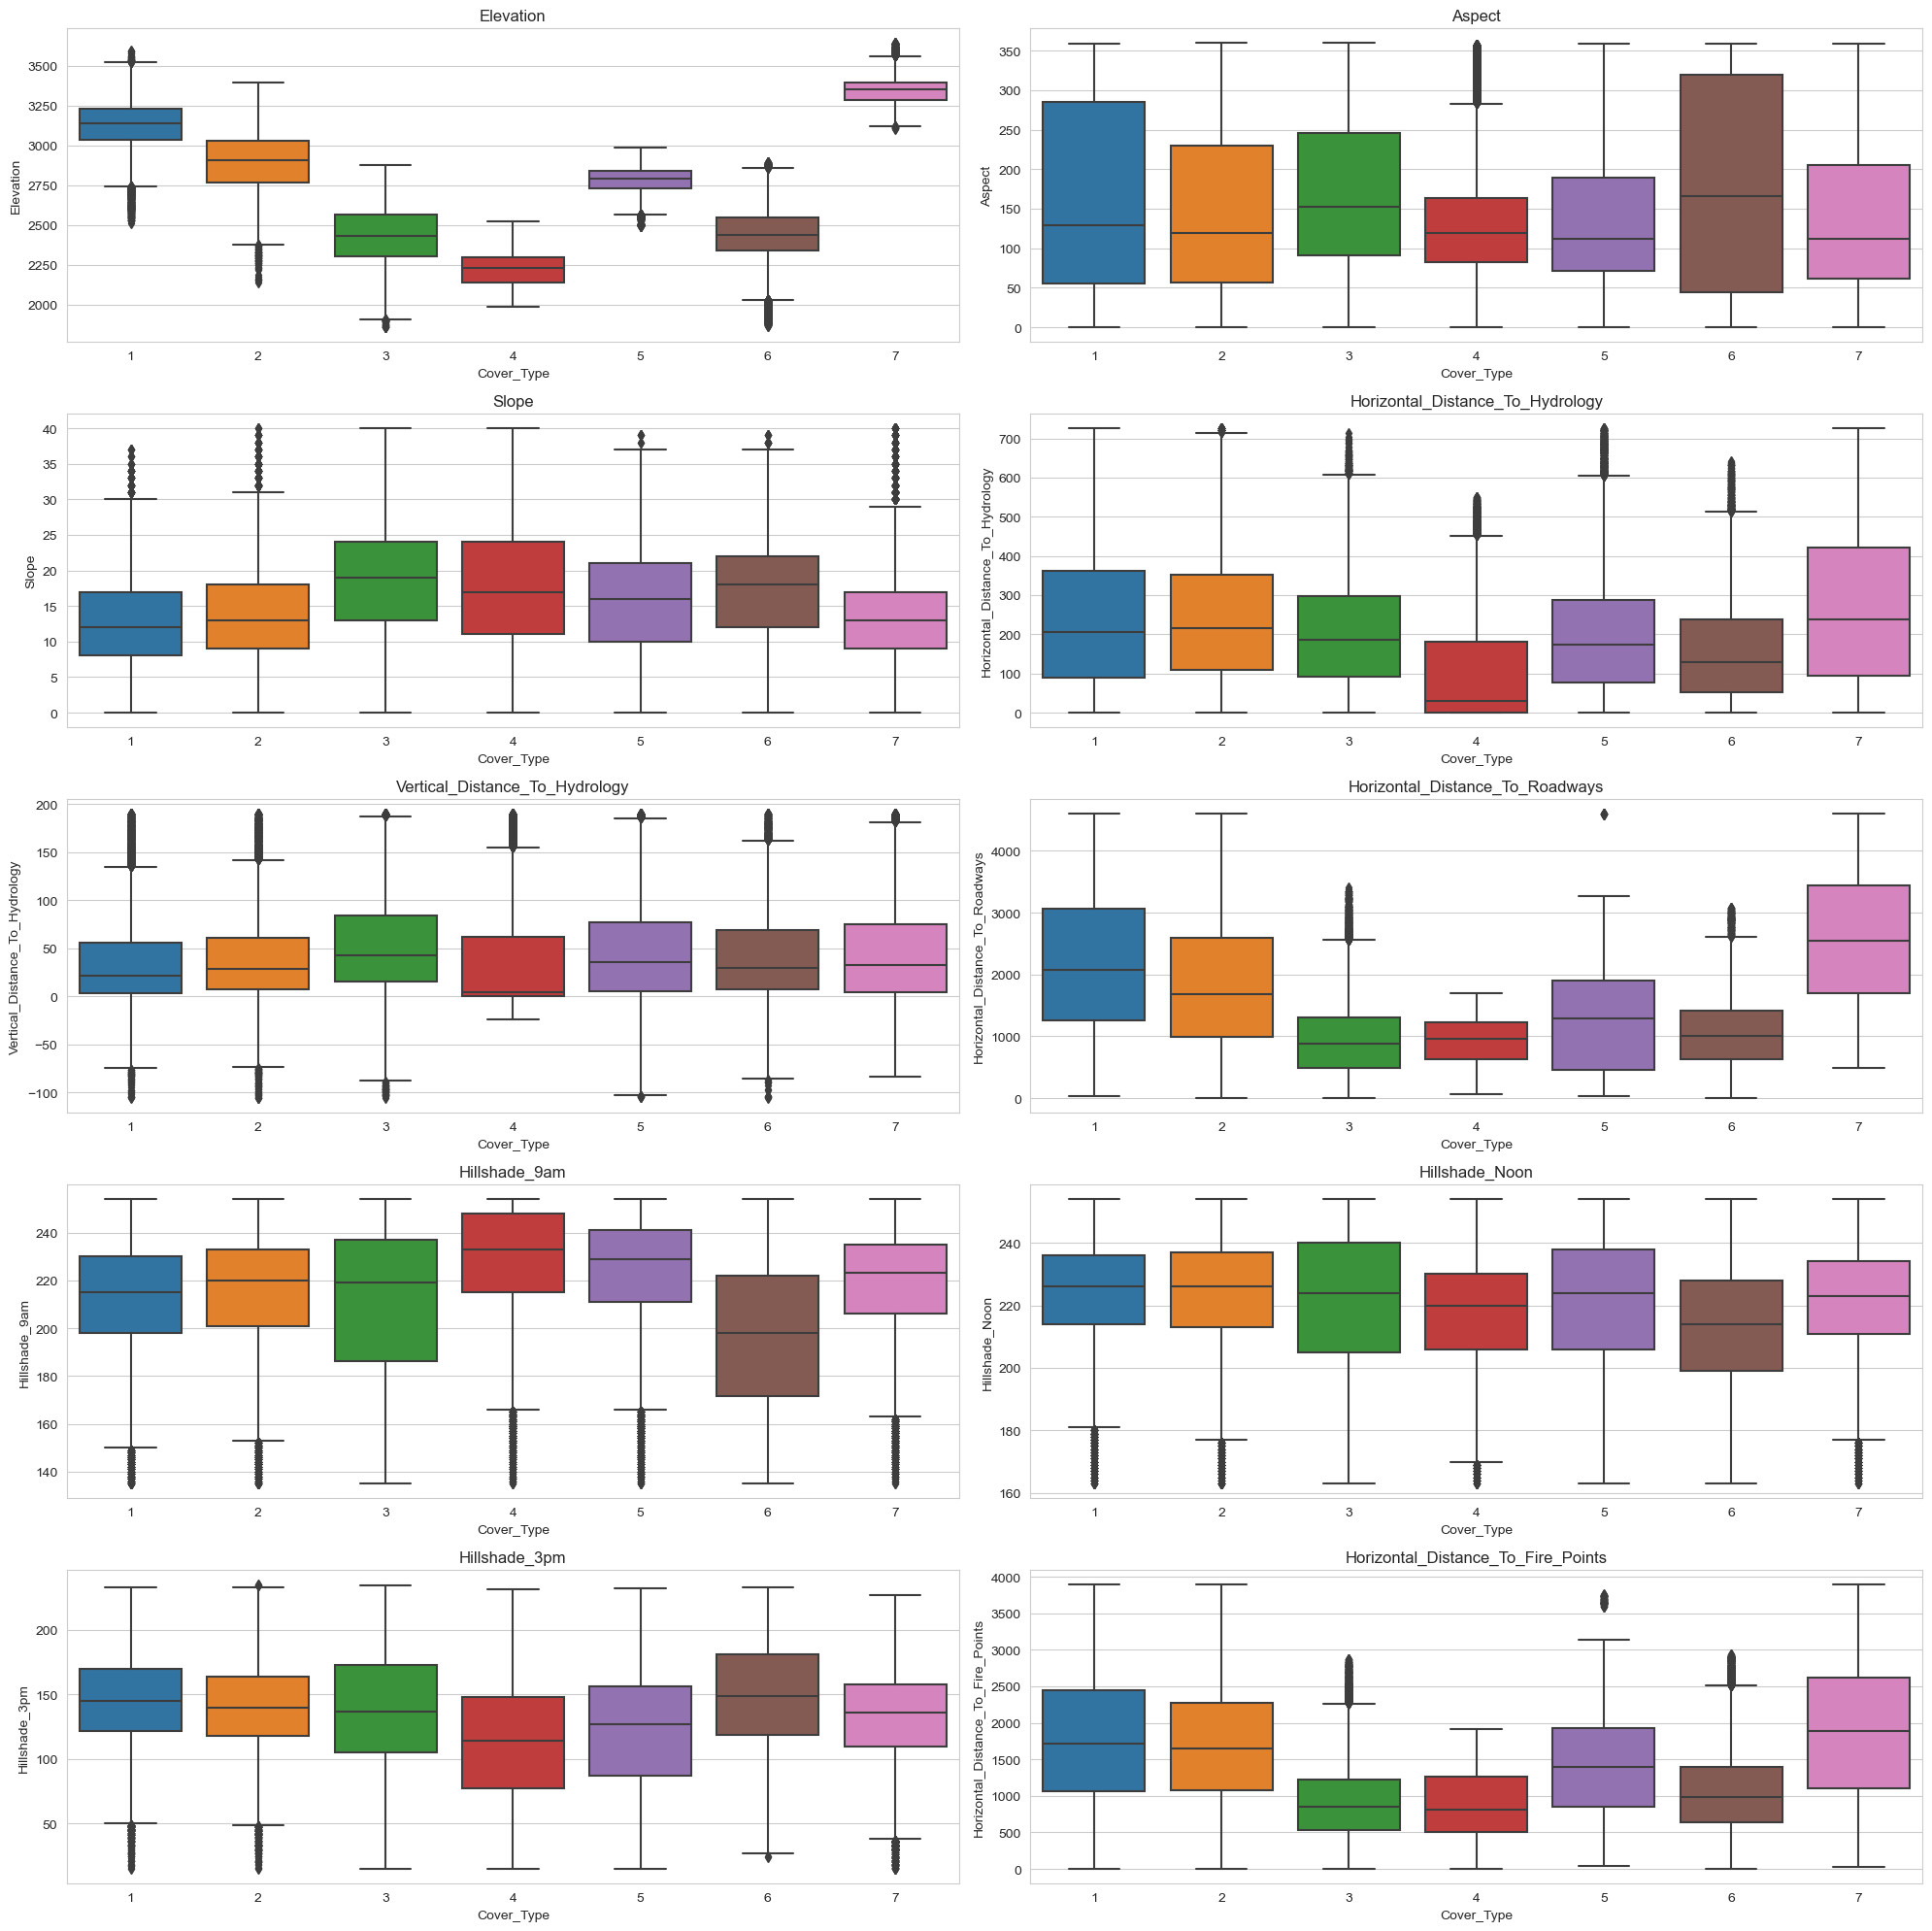

In [20]:
plt.figure(figsize=(20,20))
for i,col in enumerate(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
            'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'],1):
    plt.subplot(5,2,i)
    plt.title(col)
    sns.boxplot(y=df1[col], x=df["Cover_Type"])
    plt.tight_layout()

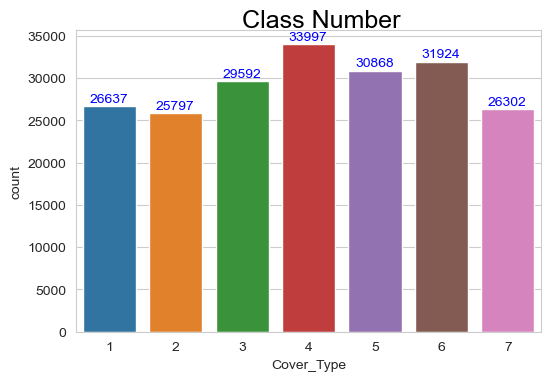

In [21]:
sns.countplot(df1.Cover_Type);
for i,val in enumerate(df1["Cover_Type"].value_counts().sort_index().to_list()):
    plt.text(i-.3,val+500,str(val),color="blue")
    # print(i,val)
plt.text(2,36000,"Class Number",fontdict={"color":"Black","fontsize":18});

In [22]:
df1.Cover_Type.value_counts(1).sort_index()

1   0.1298624687
2   0.1257672450
3   0.1442688807
4   0.1657444288
5   0.1504897205
6   0.1556380017
7   0.1282292545
Name: Cover_Type, dtype: float64

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [23]:
df1.isnull().sum().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

### Deal with Outliers

#### *ii. Drop Outliers*

### Now, let's take a closer look at correlation of continuous columns.

***
***

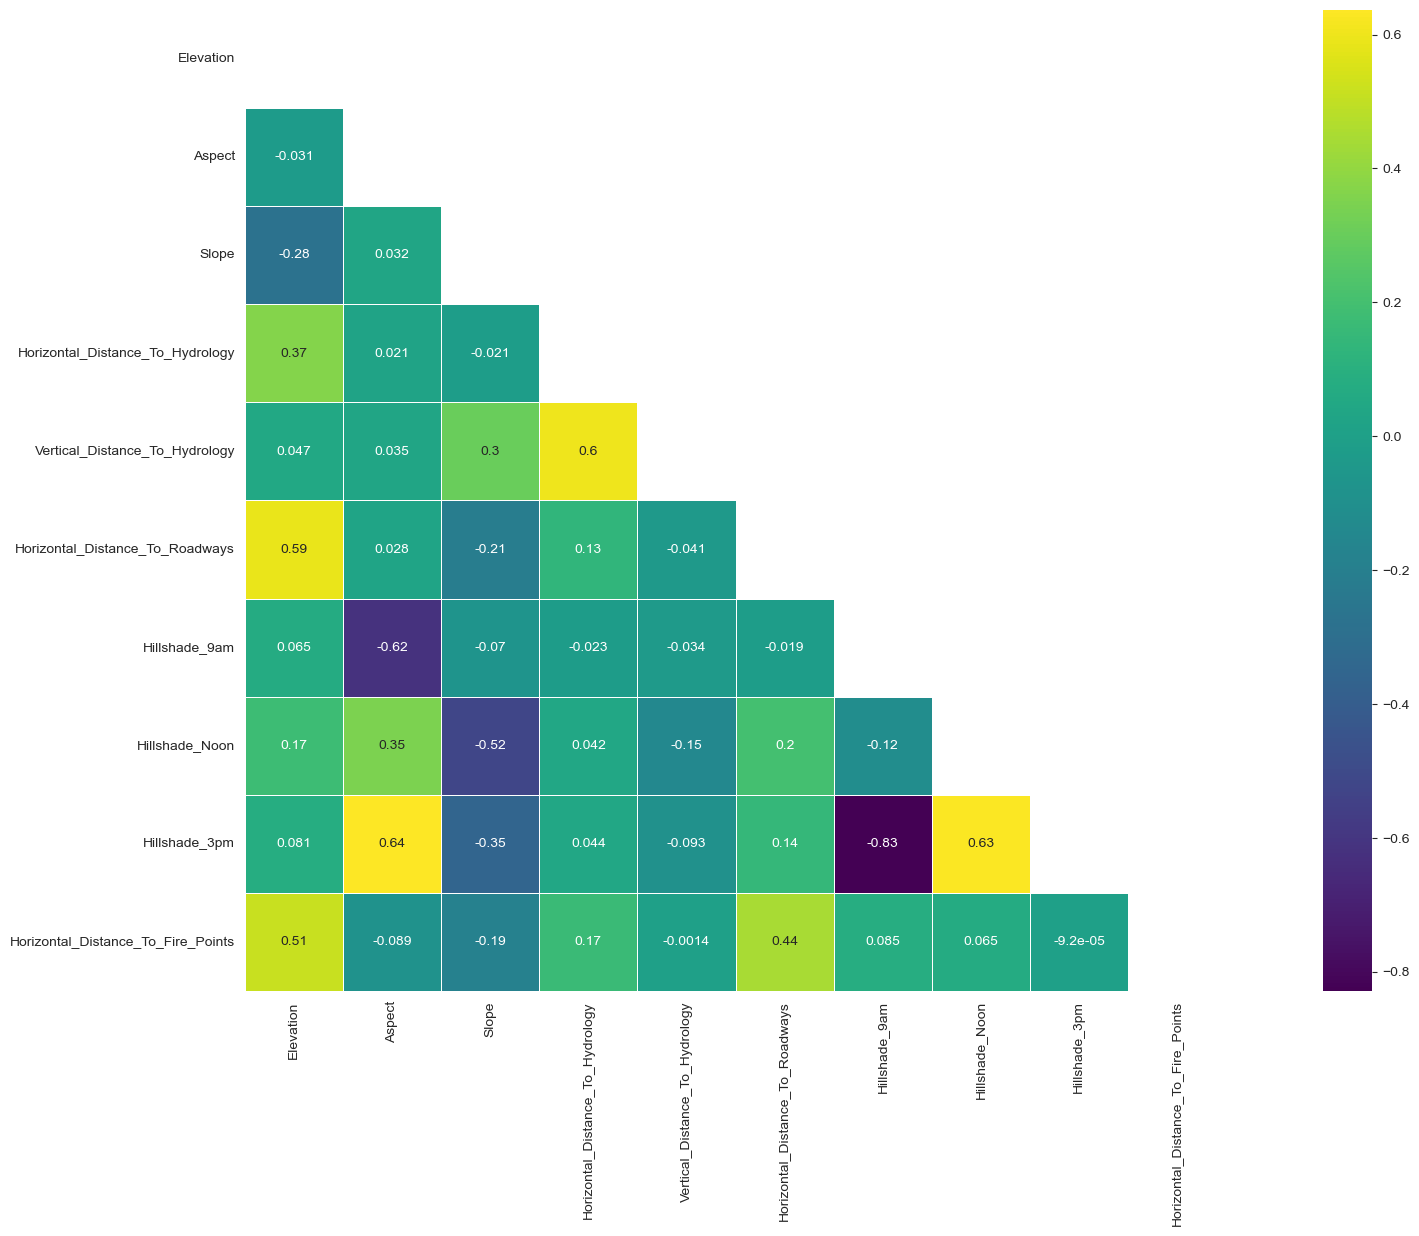

In [24]:
corr = df1[lst].corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(25, 13))
sns.heatmap(corr, mask=mask, annot=True, cmap="viridis", square=True, linewidths=.5);

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [25]:
df1["hypo_distance"] = (df1["Horizontal_Distance_To_Hydrology"]**2 + df1["Vertical_Distance_To_Hydrology"]**2)**.5
df1["Average_Dist_Road_Hydro"] = (df1.Horizontal_Distance_To_Hydrology + df1.Horizontal_Distance_To_Roadways)/2 
df1["Average_Elevation_Hydro"] = (df1.Elevation + df1.Vertical_Distance_To_Hydrology) /2

In [26]:
df1.drop([
    "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways", "Elevation"
], axis=1, inplace=True)

In [21]:
# df1= df1.drop(["Hillshade_9am"], axis=1)

In [28]:
numeric_cols = [ col for col in df1.columns if df1[col].nunique() > 7]
numeric_cols

['Aspect',
 'Slope',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'hypo_distance',
 'Average_Dist_Road_Hydro',
 'Average_Elevation_Hydro']

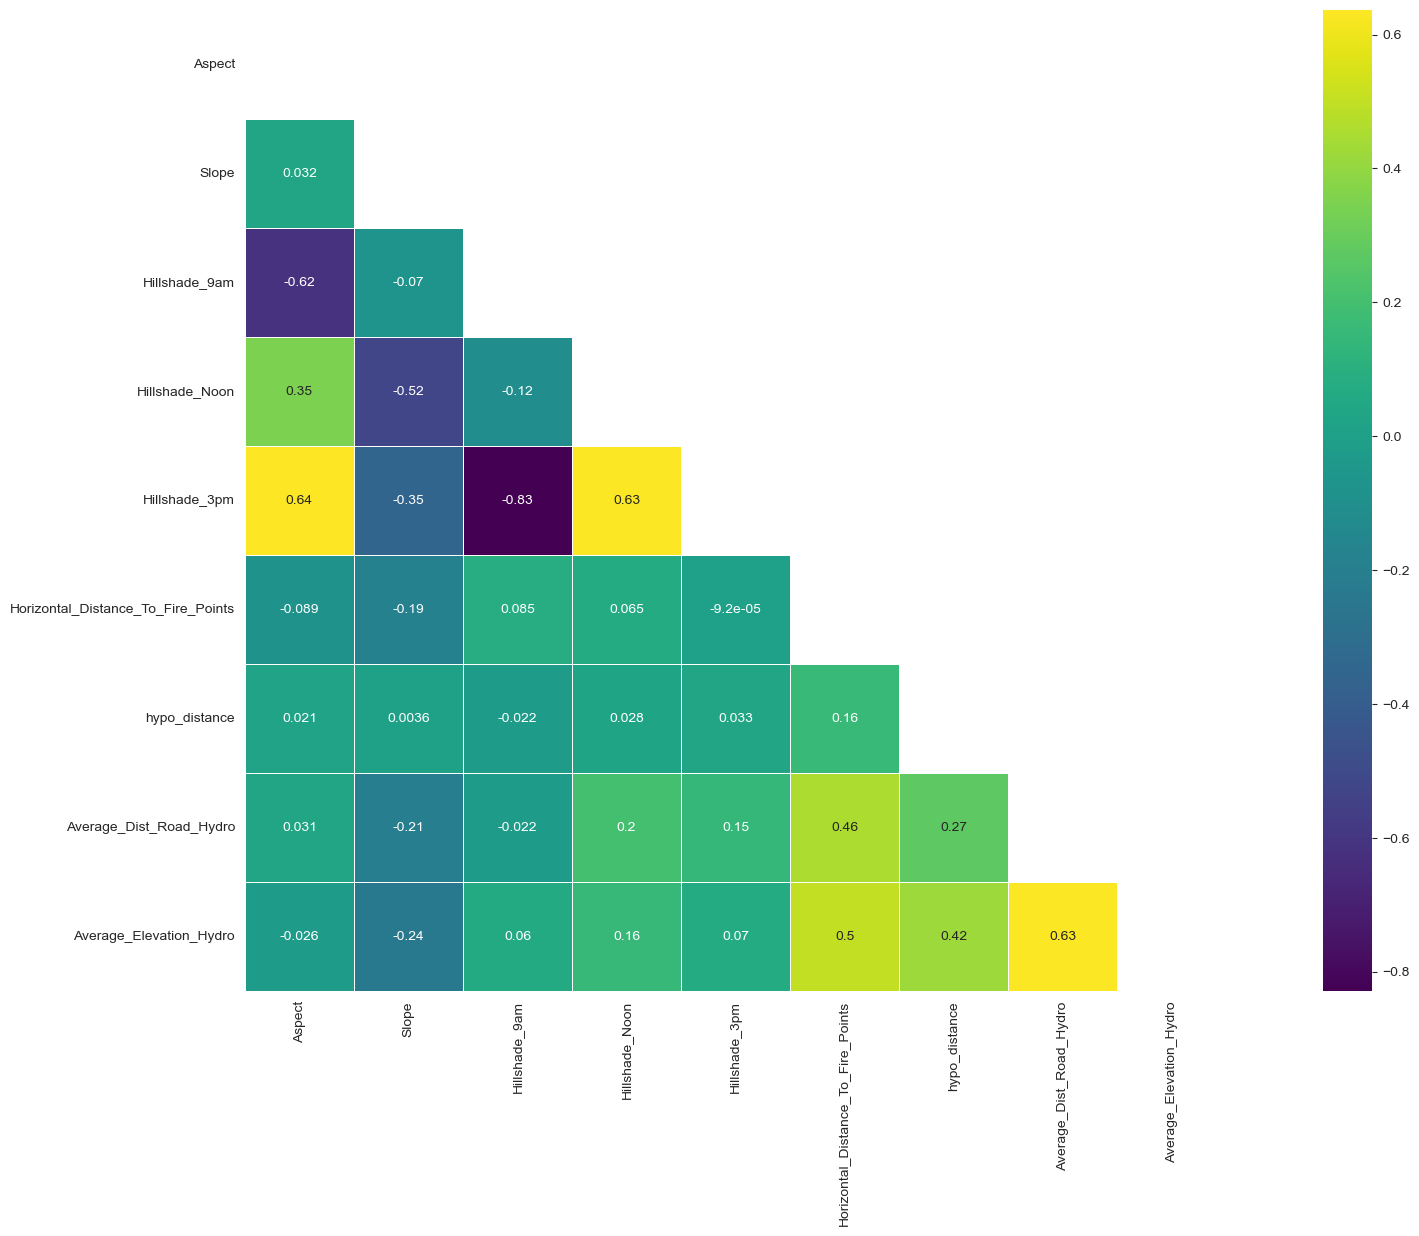

In [29]:

corr = df1[numeric_cols].corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(25, 13))
sns.heatmap(corr, mask=mask, annot=True, cmap="viridis", square=True, linewidths=.5);

In [30]:
df1.to_csv("covtype2.csv", index = False)

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [31]:
from sklearn.model_selection import train_test_split

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [32]:
X = df.drop("Cover_Type", axis = 1)

y = df["Cover_Type"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=101)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [34]:
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
model_LSVC = LinearSVC(max_iter=2000)
model_LSVC.fit(X_train_scaled, y_train)
y_pred_test = model_LSVC.predict(X_test_scaled)
y_pred_train = model_LSVC.predict(X_train_scaled)

In [37]:
model_LSVC.score(X_test_scaled,y_test)

0.6708133333333334

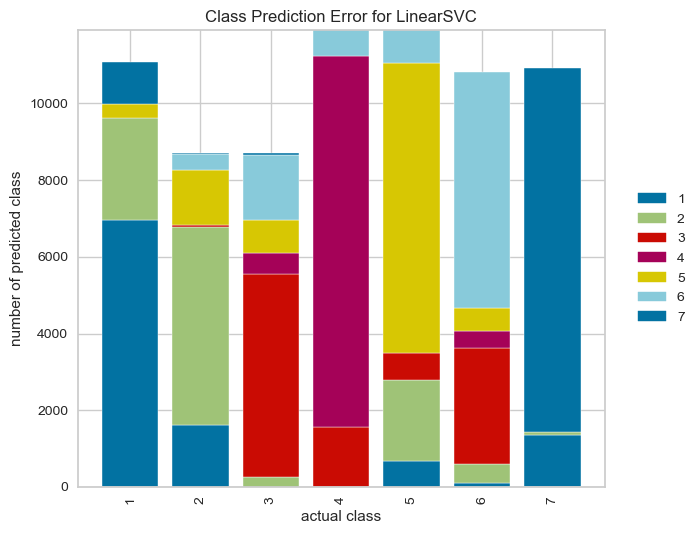

<AxesSubplot:title={'center':'Class Prediction Error for LinearSVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [38]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(model_LSVC)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.show()

In [39]:
from sklearn.ensemble import BaggingClassifier

In [40]:
model_SVC = SVC(kernel="linear")
model_baggingSVC = BaggingClassifier(model_SVC, n_jobs=-1, n_estimators=5, max_samples=0.1)
model_baggingSVC.fit(X_train_scaled, y_train)
y_pred_test = model_baggingSVC.predict(X_test_scaled)
y_pred_train = model_baggingSVC.predict(X_train_scaled)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

TEST REPORT
[[7261 1790   17    0  404   51 1228]
 [2402 5704  248    5 1957  361   57]
 [   0   99 5082 1505  329 3602    0]
 [   0    0  479 9768    0  412    0]
 [ 125 1393  422    0 8618  266    0]
 [   2  174 1929  860  306 7437    0]
 [1236    0   30    0   12    0 9429]]
              precision    recall  f1-score   support

           1       0.66      0.68      0.67     10751
           2       0.62      0.53      0.57     10734
           3       0.62      0.48      0.54     10617
           4       0.80      0.92      0.86     10659
           5       0.74      0.80      0.77     10824
           6       0.61      0.69      0.65     10708
           7       0.88      0.88      0.88     10707

    accuracy                           0.71     75000
   macro avg       0.71      0.71      0.71     75000
weighted avg       0.71      0.71      0.71     75000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
[[16988  4201    44     0   951    99  2802]
 

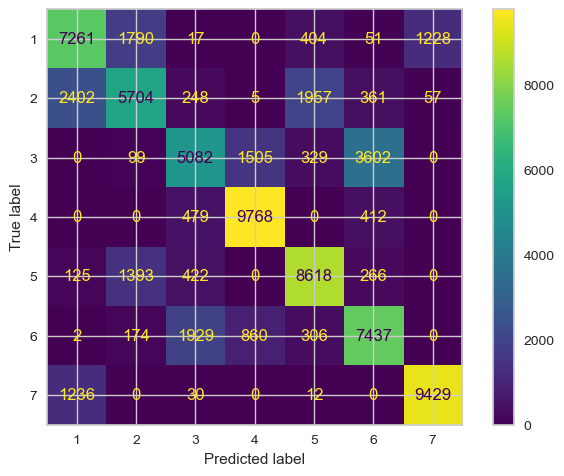

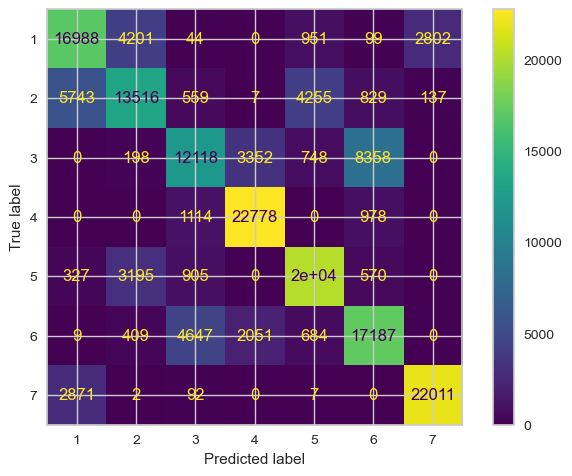

In [42]:
print("TEST REPORT")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(model_baggingSVC, X_test_scaled, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(model_baggingSVC, X_train_scaled, y_train);

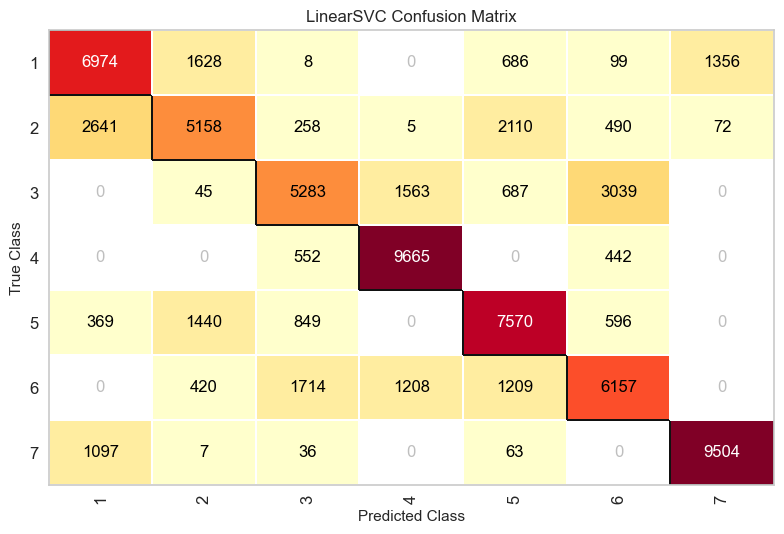

<AxesSubplot:title={'center':'LinearSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [56]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model_LSVC)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

In [57]:
from sklearn.metrics import f1_score, accuracy_score
scores = {}

In [58]:
y_test.shape, y_pred_test.shape

((75000,), (75000,))

In [59]:
y_pred_test = model_LSVC.predict(X_test_scaled)
y_pred_train = model_LSVC.predict(X_train_scaled)
scores["model_LSVC"]={}
scores["model_LSVC"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_LSVC"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_LSVC"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_LSVC"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
scores


{'model_LSVC': {'f1_score_test': 0.6654127085964525,
  'f1_score_train': 0.6687316077041535,
  'accuracy_score_test': 0.6708133333333334,
  'accuracy_score_train': 0.6739942857142858}}

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
model_Tree = DecisionTreeClassifier()
model_Tree.fit(X_train , y_train)


DecisionTreeClassifier()

In [62]:
y_pred_test = model_Tree.predict(X_test)
y_pred_train = model_Tree.predict(X_train)
scores["model_Tree"]={}
scores["model_Tree"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_Tree"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_Tree"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_Tree"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)


In [63]:
scores["model_LSVC"], scores["model_Tree"],

({'f1_score_test': 0.6654127085964525,
  'f1_score_train': 0.6687316077041535,
  'accuracy_score_test': 0.6708133333333334,
  'accuracy_score_train': 0.6739942857142858},
 {'f1_score_test': 0.9322687424476815,
  'f1_score_train': 1.0,
  'accuracy_score_test': 0.9326266666666667,
  'accuracy_score_train': 1.0})

In [64]:
pd.DataFrame(scores)[["model_Tree","model_LSVC"]].T

,f1_score_test,f1_score_train,accuracy_score_test,accuracy_score_train
model_Tree,0.9322687424,1.0000000000,0.9326266667,1.0000000000
model_LSVC,0.6654127086,0.6687316077,0.6708133333,0.6739942857


In [65]:
def eval_model(model,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train):
    cm = ConfusionMatrix(model)
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()
    print("TEST REPORT")
    print(confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))
    
    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    cm.score(X_train, y_train)
    cm.show()
    print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_train, y_pred_train))

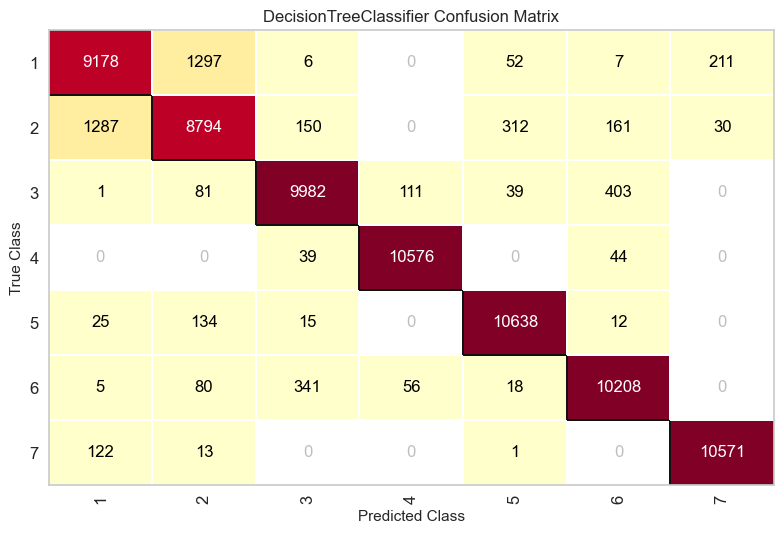

TEST REPORT
[[ 9178  1297     6     0    52     7   211]
 [ 1287  8794   150     0   312   161    30]
 [    1    81  9982   111    39   403     0]
 [    0     0    39 10576     0    44     0]
 [   25   134    15     0 10638    12     0]
 [    5    80   341    56    18 10208     0]
 [  122    13     0     0     1     0 10571]]
              precision    recall  f1-score   support

           1       0.86      0.85      0.86     10751
           2       0.85      0.82      0.83     10734
           3       0.95      0.94      0.94     10617
           4       0.98      0.99      0.99     10659
           5       0.96      0.98      0.97     10824
           6       0.94      0.95      0.95     10708
           7       0.98      0.99      0.98     10707

    accuracy                           0.93     75000
   macro avg       0.93      0.93      0.93     75000
weighted avg       0.93      0.93      0.93     75000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPO

In [66]:
eval_model(model_Tree,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train)

In [67]:
model = DecisionTreeClassifier(random_state=101)
from sklearn.model_selection import   cross_validate
scoress = cross_validate(model, X_train, y_train, scoring = ["accuracy", "f1_macro"], cv = 10)
df_scores = pd.DataFrame(scoress, index = range(1, 11))


In [68]:
df_scores.iloc[:,2:],df_scores.iloc[:,2:].mean()

(    test_accuracy  test_f1_macro
 1    0.9240571429   0.9238458438
 2    0.9274857143   0.9272229744
 3    0.9248571429   0.9245081954
 4    0.9268571429   0.9264250060
 5    0.9245142857   0.9239197844
 6    0.9244571429   0.9241178249
 7    0.9261142857   0.9259207715
 8    0.9239428571   0.9235740144
 9    0.9282285714   0.9278600446
 10   0.9248571429   0.9245370724,
 test_accuracy   0.9255371429
 test_f1_macro   0.9251931532
 dtype: float64)

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
model = DecisionTreeClassifier()
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3,4, 5,6, 7],
              "max_depth": [None, 2,3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}
model_Tree_gs = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_macro',
                          cv=5,
                          n_jobs = -1)
model_Tree_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_macro')

In [71]:
model_Tree_gs.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [72]:
model_Tree_gs.best_score_


0.9216766199869382

In [73]:
model_Tree_tuned = DecisionTreeClassifier(max_depth= None, max_features= None, min_samples_leaf= 1, min_samples_split = 2, splitter='best')
model_Tree_tuned.fit(X_train , y_train)

DecisionTreeClassifier()

In [74]:
y_pred_test = model_Tree_tuned.predict(X_test)
y_pred_train = model_Tree_tuned.predict(X_train)
scores["model_Tree_tuned"]={}
scores["model_Tree_tuned"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_Tree_tuned"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_Tree_tuned"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_Tree_tuned"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
# 

In [75]:
pd.DataFrame(scores)

,model_LSVC,model_Tree,model_Tree_tuned
f1_score_test,0.6654127086,0.9322687424,0.9331808060
f1_score_train,0.6687316077,1.0000000000,1.0000000000
accuracy_score_test,0.6708133333,0.9326266667,0.9335200000
accuracy_score_train,0.6739942857,1.0000000000,1.0000000000


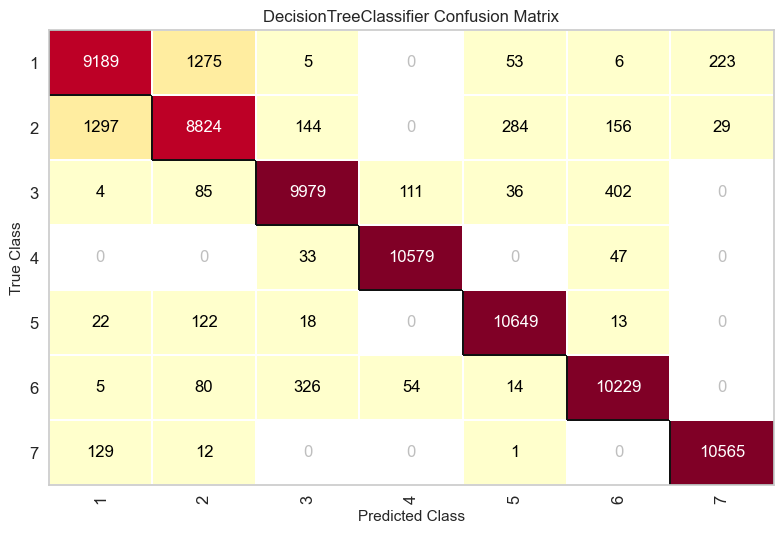

TEST REPORT
[[ 9189  1275     5     0    53     6   223]
 [ 1297  8824   144     0   284   156    29]
 [    4    85  9979   111    36   402     0]
 [    0     0    33 10579     0    47     0]
 [   22   122    18     0 10649    13     0]
 [    5    80   326    54    14 10229     0]
 [  129    12     0     0     1     0 10565]]
              precision    recall  f1-score   support

           1       0.86      0.85      0.86     10751
           2       0.85      0.82      0.84     10734
           3       0.95      0.94      0.94     10617
           4       0.98      0.99      0.99     10659
           5       0.96      0.98      0.97     10824
           6       0.94      0.96      0.95     10708
           7       0.98      0.99      0.98     10707

    accuracy                           0.93     75000
   macro avg       0.93      0.93      0.93     75000
weighted avg       0.93      0.93      0.93     75000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPO

In [76]:
eval_model(model_Tree_tuned,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train)

In [77]:
model_Tree_bagg = BaggingClassifier(DecisionTreeClassifier(), n_jobs=-1, max_samples=.1,n_estimators=20)

model_Tree_bagg.fit(X_train , y_train)
y_pred_test = model_Tree_bagg.predict(X_test)
y_pred_train = model_Tree_bagg.predict(X_train)
print(
    "f1_train:", f1_score(y_train,y_pred_train,average="macro"),
    "f1_test:", f1_score(y_test,y_pred_test,average="macro"),
    "\n",
    "Accuracy_train:", accuracy_score(y_train,y_pred_train),
    "Accuracy_test:", accuracy_score(y_test,y_pred_test)    
      )

f1_train: 0.9303646263820821 f1_test: 0.9097865626662415 
 Accuracy_train: 0.9312971428571428 Accuracy_test: 0.9111333333333334


In [78]:
scores["model_Tree_bagg"]={}
scores["model_Tree_bagg"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_Tree_bagg"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_Tree_bagg"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_Tree_bagg"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
pd.DataFrame(scores)[["model_LSVC","model_Tree","model_Tree_tuned","model_Tree_bagg"]].T

,f1_score_test,f1_score_train,accuracy_score_test,accuracy_score_train
model_LSVC,0.6654127086,0.6687316077,0.6708133333,0.6739942857
model_Tree,0.9322687424,1.0000000000,0.9326266667,1.0000000000
model_Tree_tuned,0.9331808060,1.0000000000,0.9335200000,1.0000000000
model_Tree_bagg,0.9097865627,0.9303646264,0.9111333333,0.9312971429


### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [79]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=100)

model_RF.fit(X_train, y_train)

RandomForestClassifier()

In [80]:
y_pred_test = model_RF.predict(X_test)
y_pred_train = model_RF.predict(X_train)

scores["model_RF"]={}
scores["model_RF"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_RF"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_RF"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_RF"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)

pd.DataFrame(scores)[["model_LSVC","model_Tree","model_Tree_tuned","model_Tree_bagg","model_RF"]].T

,f1_score_test,f1_score_train,accuracy_score_test,accuracy_score_train
model_LSVC,0.6654127086,0.6687316077,0.6708133333,0.6739942857
model_Tree,0.9322687424,1.0000000000,0.9326266667,1.0000000000
model_Tree_tuned,0.9331808060,1.0000000000,0.9335200000,1.0000000000
model_Tree_bagg,0.9097865627,0.9303646264,0.9111333333,0.9312971429
model_RF,0.9593242980,0.9999943198,0.9596400000,0.9999942857


In [ ]:
param_grid = {'n_estimators':[30,100,200],
             'criterion': ["gini","entropy"],
             'max_depth':[10,13,16],
             'min_samples_split':[2,6,10],
             }
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="f1_macro",
                             refit=True,
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [ ]:
eval_model(model_RF,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train)


In [ ]:
model = model_RF
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
scores["model_RF"]={}
scores["model_RF"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_RF"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_RF"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_RF"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)

In [ ]:
pd.DataFrame(scores)

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [ ]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier().fit(X_train , y_train)
y_pred_test = model_XGB.predict(X_test)
y_pred_train = model_XGB.predict(X_train)
scores["model_XGB"]={}
scores["model_XGB"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_XGB"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_XGB"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_XGB"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
pd.DataFrame(scores)

In [ ]:
eval_model(model_XGB,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train)


In [ ]:
fi = pd.DataFrame(model_XGB.feature_importances_, index=list(X_train.columns), columns=["fi"])
fi = fi.sort_values("fi",ascending=False)
fi

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

In [ ]:
comp = pd.DataFrame(scores)
comp.loc[["accuracy_score_test","accuracy_score_train"]].plot.barh()

# F1 Score Comparison

In [ ]:
comp.loc[["f1_score_test","f1_score_train"]].plot.barh()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___